# Light GBM

***Light GBM, XGBoost'un eğitim süresi performansını arttırmaya yönelik geliştirilen bir diğer GBM türüdür.*** _Microsoft 2017_

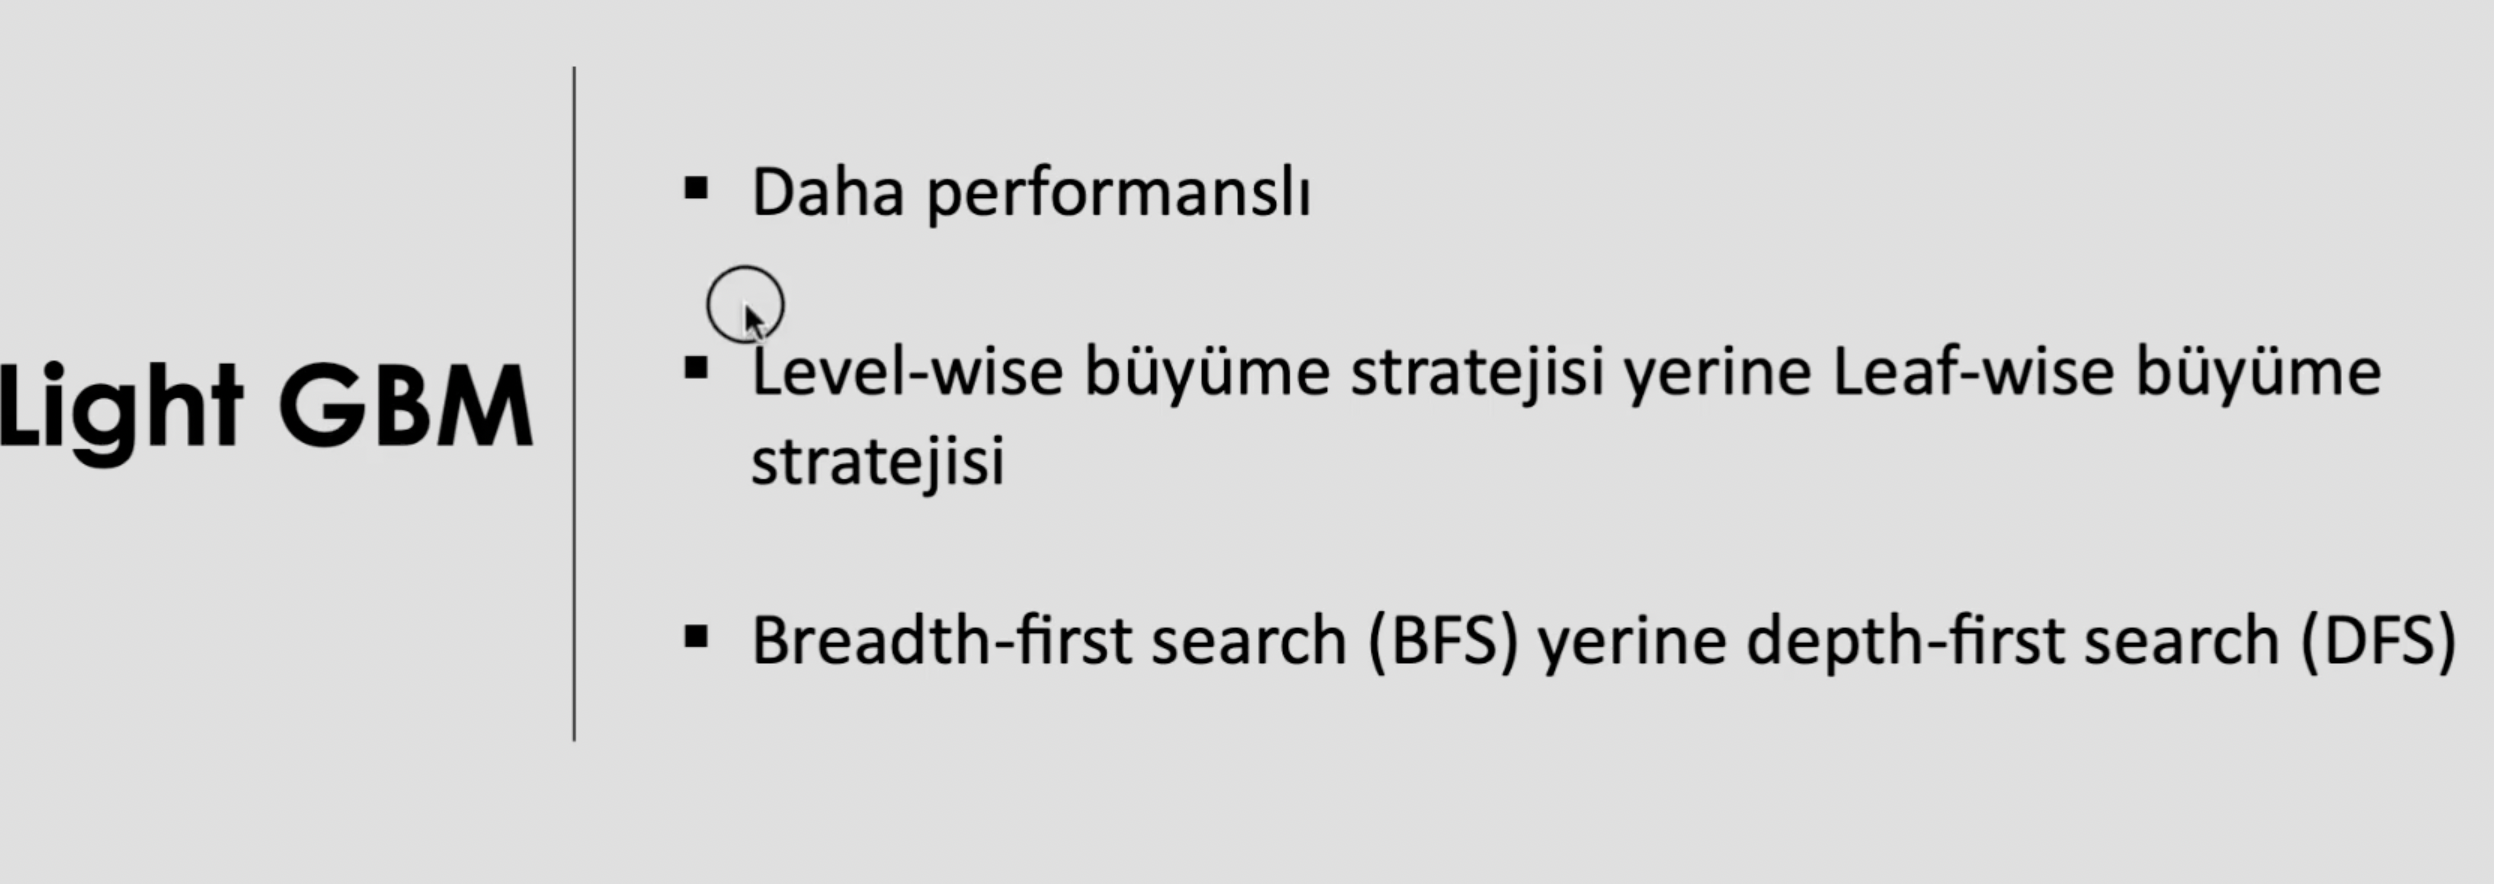

# Model

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [3]:
# !pip install lightgbm

In [6]:
from lightgbm import LGBMRegressor

In [5]:
# conda install -c conda-forge lightgbm

In [7]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

# Tahmin

In [8]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

In [9]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

# Model Tuning

In [17]:
lgbm_model

LGBMRegressor()

In [18]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [19]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=4, n_estimators=20; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.

GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [20, 40, 100, 200, 500, 1000]},
             verbose=2)

In [20]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 20}

In [21]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 7, 
                           n_estimators = 40,
                          colsample_bytree = 0.6)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [22]:
y_pred = lgbm_tuned.predict(X_test)

In [23]:
np.sqrt(mean_squared_error(y_test, y_pred))

372.7342551250238